## Month 1: Some Reading <a class="anchor" id="t12"></a>

During this month we have put together several similar projects. For example, [F. Malik et al.](https://www.mdpi.com/1424-8220/20/13/3749) forecasted traffic based on air pollution through a model based on LSTM.

On the dependence of the weather on traffic there are many studies, especially focused on precipitation. None of the studies are carried out in Madrid, but in several large cities such as Manchester ([A. Essien et al.](https://pure.manchester.ac.uk/ws/portalfiles/portal/72721911/DEXA_Camera_8_pages.pdf)), Shenzhen ([Y. Yao et al.](https://ieeexplore.ieee.org/document/8964560)), Belgrade ([M. Vidas et al.](https://www.safetylit.org/citations/index.php?fuseaction=citations.viewdetails&citationIds[]=citjournalarticle_716898_14)). The results of these studies predict a 5-15% increase in traffic volume on weekdays during peak hours.

## Month 2: Load Datasets <a class="anchor" id="t12"></a>

During the last month we have been searching for useful datasets and reading its documentation. During this record we will load the datasets that are going to be used during the project. For the tests, data from a single month will be used. Although there is traffic and weather information from 2018.

**Weather**

[Weather data](https://datos.madrid.es/portal/site/egob/menuitem.3efdb29b813ad8241e830cc2a8a409a0/?vgnextoid=4950cc720ba29610VgnVCM2000001f4a900aRCRD&vgnextchannel=102612b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)  is captured by stations located throughout the city of Madrid. The files offered by the [Madrid City Council](https://datos.madrid.es/portal/site/egob) are in csv. They were loaded using the pandas library:

In [1]:
import csv 
import pandas as pd

weather = pd.read_csv('dic_meteo22.csv', sep = ";", quoting=csv.QUOTE_NONE, encoding='utf-8').dropna()
weather.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,108,81,28079108_81_98,2022,12,22,270.0,N,...,218.0,V,228.0,V,227.83,V,213.67,V,233.83,V
1,28,79,108,82,28079108_82_98,2022,12,22,9.0,N,...,10.0,V,10.0,V,9.00,V,9.00,V,8.00,V
2,28,79,108,83,28079108_83_98,2022,12,22,94.7,N,...,86.7,V,91.4,V,93.80,V,96.30,V,98.70,V
3,28,79,108,86,28079108_86_98,2022,12,22,1031.0,N,...,1031.0,V,1031.0,V,1031.00,V,1031.00,V,1031.00,V
4,28,79,108,87,28079108_87_98,2022,12,22,2.0,N,...,1.0,V,3.0,V,2.00,V,3.00,V,3.00,V


In the documentation they tell us that the magnitude column indicates what type of meteorological data has been taken in the row:

    · 80: ultraviolet
    · 81: wind
    · 82: direction
    · 83: temperature
    · 86: humidity
    · 87: pressure
    · 88: solar
    · 89: rainfall
    
Then we have two columns for each hour so that the first tells us the value for the data type specified by the magnitude column and if the result is valid or not. We also have columns related to the time in which the measurement is taken. Finally, there is the identifier of the meteorological station which we can connect with its coordinates using this other [table](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=2ac5be53b4d2b610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default) provided by the Madrid city council:

In [2]:
weather_station = pd.read_csv('Estaciones_control_datos_meteorologicos.csv', sep = ";", quoting=csv.QUOTE_NONE, encoding='latin-1')

**Traffic**

Traffic sensors are located at traffic lights in the city of Madrid. The data obtained is made up of several measurements of the road situation such as speed or traffic volume. All of these metrics are coded into the "load" metric (a percentage that measures congestion). The [traffic table](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=02f2c23866b93410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD) is also provided by the Madrid City Council.

In [3]:
traffic = pd.read_csv('12-2022.csv', sep = ";", quotechar='"', encoding='utf-8').dropna()
traffic.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2022-12-01 00:00:00,M30,3240,9.0,0,59.0,N,5
1,1001,2022-12-01 00:15:00,M30,3240,9.0,0,59.0,N,5
2,1001,2022-12-01 00:30:00,M30,300,1.0,0,66.0,N,5
3,1001,2022-12-01 00:45:00,M30,300,1.0,0,66.0,N,5
4,1001,2022-12-01 01:00:00,M30,300,1.0,0,66.0,N,5


The table also contains a column for the date and another that identifies the sensor that will be used to link it with its coordinates using the following [table](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=ee941ce6ba6d3410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD):

In [4]:
traffic_station = pd.read_csv('pmed_ubicacion_12-2022.csv', sep = ";", quoting=csv.QUOTE_NONE, encoding='utf-8').dropna()

## Month 3: Arranging the datasets

Once the data has been loaded, during this month we prepared the data to be used in the analysis and the model. We will show this procedure throughout this report. As we are dealing with heterogeneous datasets, the cleaning of the data will be done independently and the data will be assembled a single table later.

#### Weather

In the weather dataset we have the date separated into day, month and year, but in traffic all these data are together. This is why the columns will be grouped.

In [5]:
weather = weather.rename(columns={"ANO": "year", "MES": "month", "DIA":"day", "MAGNITUD":"magnitud", "ESTACION":"weather_station"})
weather["date"] = pd.to_datetime(weather[["year", "month", "day"]])
weather["date"][0]

Timestamp('2022-12-22 00:00:00')

The next step was to transform the measurement value columns and their hourly validity into independent rows. We take the opportunity to remove invalid measurements:

In [6]:
import re

# Melt table to generate the hour column
weather_hour = weather.melt(id_vars=["weather_station", "magnitud", "date"],
                            value_vars=[x for x in weather.columns if re.match("^H", x)],
                            var_name="hour")
weather_hour["hour"] = pd.to_timedelta(weather_hour['hour'].str[1:].astype(int) - 1 , unit='h')

# Melt table to create the valid table
weather_valid = weather.melt( value_vars=[x for x in weather.columns if re.match("^V", x)], var_name="valid")

# Take the valid rows
weather = weather_hour[weather_valid["value"] == "V"].reset_index()

To homogenize the time measure with the traffic table we join the date with the time:

In [7]:
weather["date"] = weather['date'] + weather.pop('hour')

Finally, to have more organized data, we convert the different types of measurement into columns:

In [8]:
weather_values = weather.assign(MAGNITUD = weather["magnitud"].map({80:"ultraviolet",
                                                             81:"wind",
                                                             82:"direction",
                                                             83:"temperature",
                                                             86:"humidity",
                                                             87:"pressure",
                                                             88:"solar",
                                                             89:"rainfall"})) \
                                                             .MAGNITUD.str.get_dummies() \
                                                             .multiply(weather["value"], axis="index") 

# Join it to the previus table
weather = pd.concat([weather, weather_values], axis=1)

# Groupby date and weather station
weather = weather.drop(["index", "magnitud", "value"], axis=1).groupby([ "date", "weather_station"]).sum().reset_index()

weather.head()

,date,weather_station,direction,humidity,pressure,rainfall,solar,temperature,wind
0,2022-12-01,4,0.0,0.0,0.0,0.0,0.0,7.1,0.00
1,2022-12-01,8,0.0,67.0,0.0,0.0,0.0,9.4,0.00
2,2022-12-01,16,0.0,73.0,0.0,0.0,0.0,8.9,0.00
3,2022-12-01,18,0.0,0.0,0.0,0.0,0.0,8.6,0.00
4,2022-12-01,24,239.0,84.0,946.0,0.0,1.0,6.0,0.54


#### Traffic

In the first place, the rows where the data collection has had an error are eliminated, for this we filter the values without measurement errors. In the documentation they tell us that these values are represented with an "N".

In [9]:
# Quitar datos con errores
traffic= traffic[traffic["error"] == "N"].rename(columns={"carga":"load", "id":"traffic_station"})

Other changes that have been made without changing the date column to a proper format and removing columns that are not needed for analysis.

In [10]:
# String a fecha
traffic['date'] = pd.to_datetime(traffic['fecha'], errors='coerce')
# Eliminar columnas innecesarias
traffic.drop(["tipo_elem", "error", "periodo_integracion", "fecha", "intensidad", "ocupacion", "vmed"], axis=1, inplace=True)

Finally, since the measurements of the sensors are taken every 15 minutes, we group the values for each hour and calculate the average so that it matches the weather table.

In [11]:
traffic = traffic.groupby([pd.Grouper(key="date", freq='1H'), 'traffic_station']).mean().reset_index()
traffic.head()

,date,traffic_station,load
0,2022-12-01,1001,0.0
1,2022-12-01,1002,0.0
2,2022-12-01,1003,0.0
3,2022-12-01,1006,0.0
4,2022-12-01,1009,0.0


The average time for loading and processing a month of traffic information is **43.9 s**. The team is concerned about the slowness and the possible effect it will have on real-time data processing.

**Location**

To join the two previous tables we need to know which traffic sensors correspond to the weather stations. To do this you can use a distance matrix and find the closest pairs.

In [12]:
weather_station = weather_station.rename(columns={"LATITUD": 'Latitude', "LONGITUD":"Longitude", "CODIGO_CORTO":"weather_station"})
traffic_station = traffic_station.rename(columns={"\"latitud\"": 'Latitude', "\"longitud\"":"Longitude"})

You could measure this distance directly with the coordinates. But to make the distances clearer, the haversine distance was used, which calculates the distance in meters between a pair of coordinates:

In [13]:
from haversine import haversine_vector, Unit

unit = Unit.KILOMETERS 
distance_matrix = haversine_vector(weather_station[["Latitude", "Longitude"]], traffic_station[["Latitude", "Longitude"]], unit, comb=True)

It can be seen in the next heatmap that these distances are between 0 and 20 km:

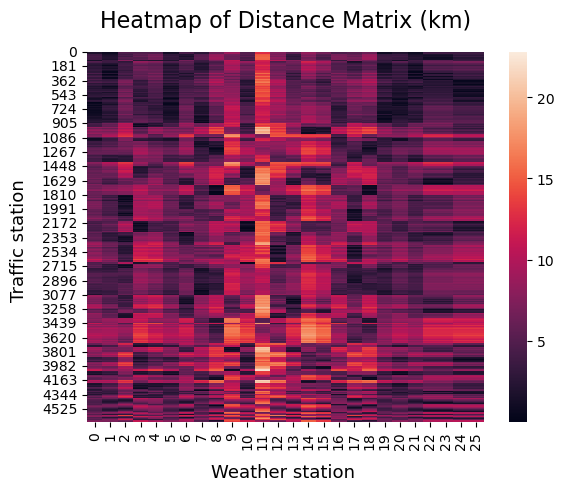

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
sns.heatmap(distance_matrix)
plt.title('Heatmap of Distance Matrix (km)', fontsize = 16, pad=18) # title with fontsize 20
plt.xlabel('Weather station ', fontsize = 13 , labelpad=10) # x-axis label with fontsize 15
plt.ylabel('Traffic station ', fontsize = 13 , labelpad=10) # y-axis label with fontsize 15
plt.show()

Finally, the traffic sensor is associated with the closest meteorological sensor to avoid long distances between both sensors.

In [14]:
import numpy as np

distance_table = pd.DataFrame.from_dict({'Distance': distance_matrix.argmin(axis=1), 
                                            'Closest':np.array(distance_matrix.min(axis=1), dtype=int)})
distance_table = distance_table.join(weather_station[["weather_station"]], on="Closest")
distance_table["traffic_station"] = distance_table.index

## Month 4: Creating Final table <a class="anchor" id="t14"></a>

Once we have prepared the 3 tables -weather, traffic and distance- we put them together:

In [15]:
# Traffic - Distance Join 
complete = traffic.merge(distance_table, on=["traffic_station"], how="left")
# Complete - Weather Join
complete = complete.merge(weather, on=["date", "weather_station"], how="left")

Finally, we can add the information of the time and the day of the week to study its dependence on the traffic load.

In [16]:
complete["weekday"] = complete["date"].dt.weekday
complete["hour"] = complete["date"].dt.hour

## Month 5: Data interpretation

Durante este mes el equipo ha trabajado en analizar si el clima tiene relación con el tráfico y si esta dependencia es lo suficientemente apreciable como para tenerla en cuenta en nuestro modelo. En este record mostramos los resultados para precipitación aunque se ha realizado un estudio similar con el resto de condiciones meteorológicas. Pero antes filtramos las horas y días con más tráfico. Los días lectivos suelen tener más tráfico que los días festivos. Así como de día suele haber más tráfico que de noche. En la siguiente figura podemos comprobarlo. De lunes a viernes hay más tráfico y de 11 a 20 también. Vemos entonces que existe una fuerte estacionalidad en los datos.

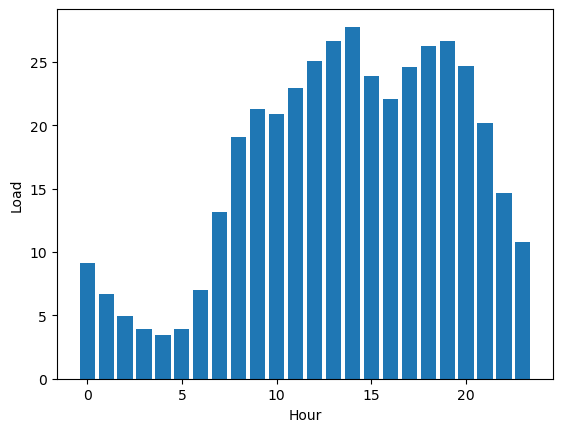

In [36]:
import matplotlib.pyplot as plt

load_per_hour = complete.groupby("hour")["load"].mean().values
plt.bar(np.arange(len(load_per_hour)), load_per_hour.reshape(-1))
plt.ylabel("Load")
plt.xlabel("Hour")
plt.show()

Los días lectivos suelen tener más tráfico que los días festivos. Así como de día suele haber más tráfico que de noche. En la siguiente figura podemos comprobarlo. De lunes a viernes hay más tráfico y de 11 a 20 también. Vemos entonces que existe una fuerte estacionalidad en los datos.

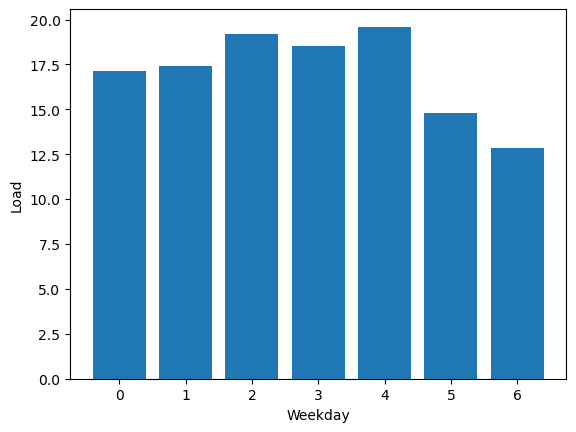

In [37]:
load_per_weekday = complete.groupby("weekday")["load"].mean().values
plt.bar(np.arange(len(load_per_weekday)), load_per_weekday.reshape(-1))
plt.ylabel("Load")
plt.xlabel("Weekday")
plt.show()

Como se puede comprobar los principales problemas de carga se dan entre las 10 a las 20 y de lunes a viernes.

In [17]:
final = complete[(complete["weekday"]<5) & (complete["hour"]>9) & (complete["hour"]<20)].reset_index()

**Rainfall-Load dependency**

Ahora sí presentamos los resultados del análisis de la dependencia de la precipitación sobre el tráfico. 

In [24]:
print(complete[["rainfall"]].describe(percentiles=[.9, .999]).to_markdown())

|       |       rainfall |
|:------|---------------:|
| count | 841068         |
| mean  |      0.0130932 |
| std   |      0.194232  |
| min   |      0         |
| 50%   |      0         |
| 90%   |      0         |
| 99.9% |      2.9       |
| max   |     10.9       |


Podemos ver en los percentiles de la columna precipitación que hay muy pocas grabaciones con lluvia. Es por esto que se dividieron en distintas clases las mediciones dependiendo del nivel de lluvia e hicimos un análisis por separado:

In [152]:
final["rainfall_m"] = pd.cut(final["rainfall"], [-1, 0.1, 1, np.inf], labels=["Normal","Wet", "Heavy"])

El análisis se hizo por horas para evitar la dependencia temporal de la carga. Podemos comprobar esto en la siguiente tabla donde el incremento de la media en horas de la congestión de tráfico con lluvia puede ir del 5% al 14%, lo que concuerda con los  estudios presentados en el record [Month 1: Some Reading](#t12).

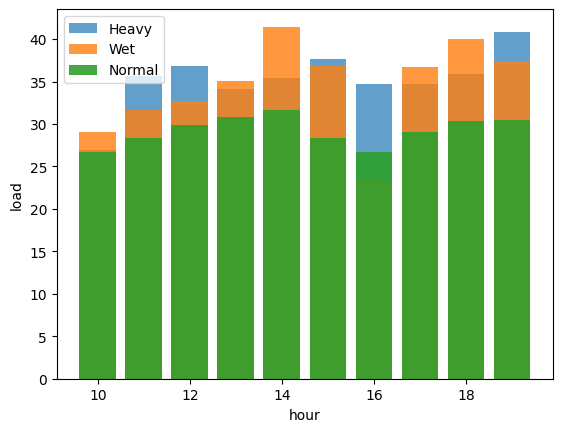

In [153]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

lista = []
j = ["Heavy", "Wet", "Normal"]
for i in j:
    t = final[final["rainfall_m"]== i]
    lista.append(t[["load","hour"]].groupby(["hour"]).agg({'load': 'mean'}).values)
    
for t, (i, u) in enumerate(zip(lista,j)):
    plt.bar(np.arange(10,10+len(i)), i.reshape(-1), label=u, alpha=0.7 + 0.1*t)
plt.legend()
plt.ylabel("load")
plt.xlabel("hour")
plt.show()

Para comprobar que estas diferencias entre grupos son significativas podemos hacer un test anova. Y vemos que en todas las horas existe una gran evidencia de que la carga es diferente entre los distintos tipos de lluvia. Por ejeplo, para la hora 12:

In [45]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('load ~ C(rainfall)', data=final[final["hour"]==12]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table.to_markdown())

|             |          sum_sq |    df |        F |       PR(>F) |
|:------------|----------------:|------:|---------:|-------------:|
| C(rainfall) | 37650.7         |     6 |  20.1144 |   1.3346e-23 |
| Residual    |     8.01363e+06 | 25687 | nan      | nan          |


Se decidió incluir la precipitación detro del modelo. El resto de condiciones meteorológicas no diereon un resultado tan claro por lo que se dejarán al margen.

## Month 6:  Playing with the Model

En este record se presenta un modelo de juguete que utiliza los datos de una sola estación. Utilizamos una red neuronal LSTM de una capa con 5 pasos ..precedidos..  

In [155]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Filtrar:

final = complete[(complete["weekday"]<5) & (complete["hour"]>9) & (complete["hour"]<20)].reset_index()
final = final[final.groupby('traffic_station')['load'].transform('mean') >= 40]

# Modificar. 
final["load"]/=100
scaler = MinMaxScaler()
final[["rainfall", "temperature"]] = scaler.fit_transform(final.iloc[:, [5,7]])

# Crear entrada:
    # Estación de tráfico 0: [datos_t0, datos_t1, datos_t2, datos_t3, ...]
    # Estación de tráfico 1: [datos_t0, datos_t1, datos_t2, datos_t3, ...]
    # ...

final = final.set_index(['date'])

# De paso creo ya el train y test.
# los primeros datos para train y luego a partir del 80 para test
# 5: Rainfall, 12: Load, 13: Hour, 14: Weekday
train = final.groupby('traffic_station').apply(lambda x: np.array(x[:-80])[:,[5, 12,13,14]].astype(float))
test  = final.groupby('traffic_station').apply(lambda x: np.array(x[-80:])[:,[5, 12,13,14]].astype(float))

# Separar en Windows, Entrada: La estacion, el dataset y los pasos hacia atras.
# La salida: Matriz con shape: Las mediciones que se han hecho en el dataset - los pasos hacia atras, 
                            #  los pasos hacia atras,
                            #  los parametros.
def time_window(traffic_station, dataset, look_back=5):
    data_X,  data_y= [], []
    # Datos estacion
    station_data = dataset[traffic_station]
    
    # Por cada dato en la estacion
    for i in range(len(station_data)-look_back-1):
        # Guardamos en x una matriz con los datos de las últimas 5 rows (Esto es lo complicado)
        data_X.append(station_data[i:(i+look_back)])
        # Guardamos en y el último dato de load. Esto en verdad son los load que van desde look_back + 1 hasta el final.
        data_y.append(station_data[i+look_back+1, 2])

    return np.array(data_X), np.array(data_y)

# Utilizamos la funcion
train_X, train_y = time_window(3403, train)
test_X, test_y = time_window(3403, test)

CPU times: total: 797 ms
Wall time: 827 ms


In [ ]:
# design network
model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape=[None,5]))
model.add(Dense(units = 1))

model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=3, batch_size=64, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()